<a href="https://colab.research.google.com/github/GabrielWateyma/sistemas-de-sobreaceleraci-n/blob/main/sistemas_de_sobreaceleraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

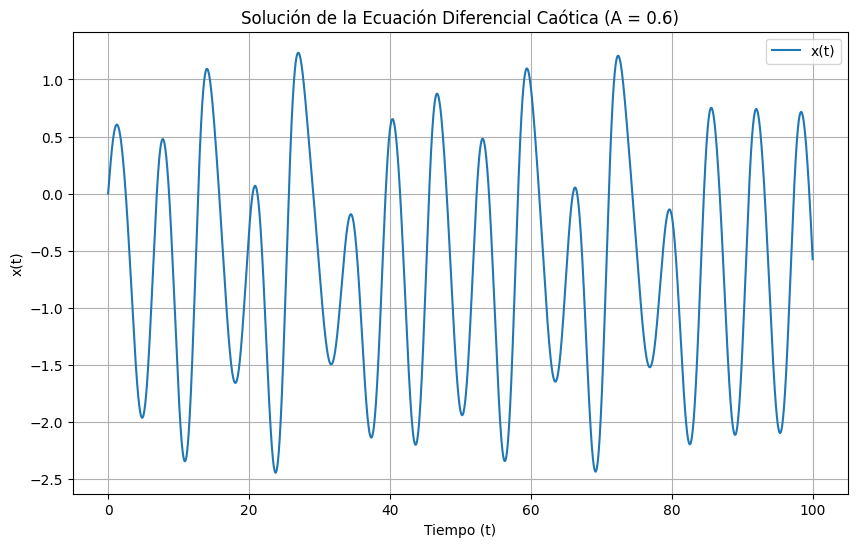

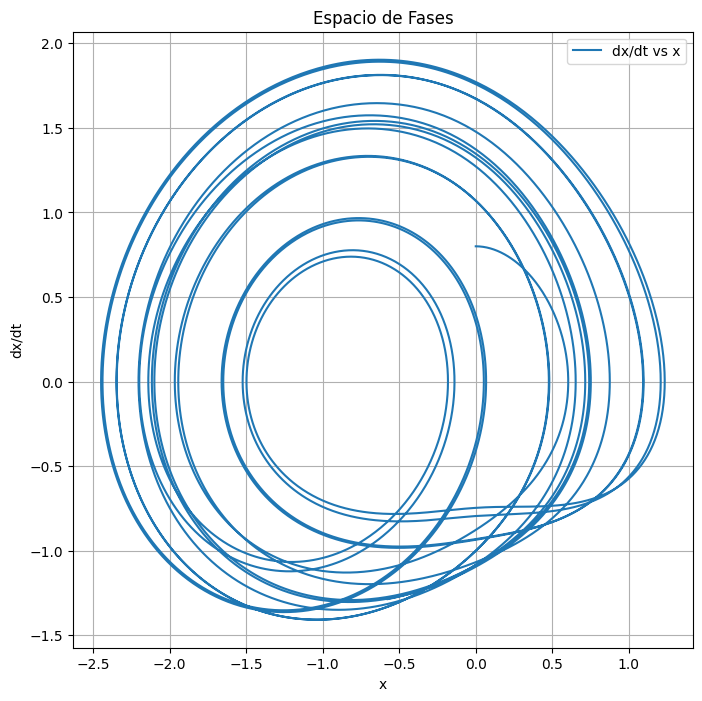

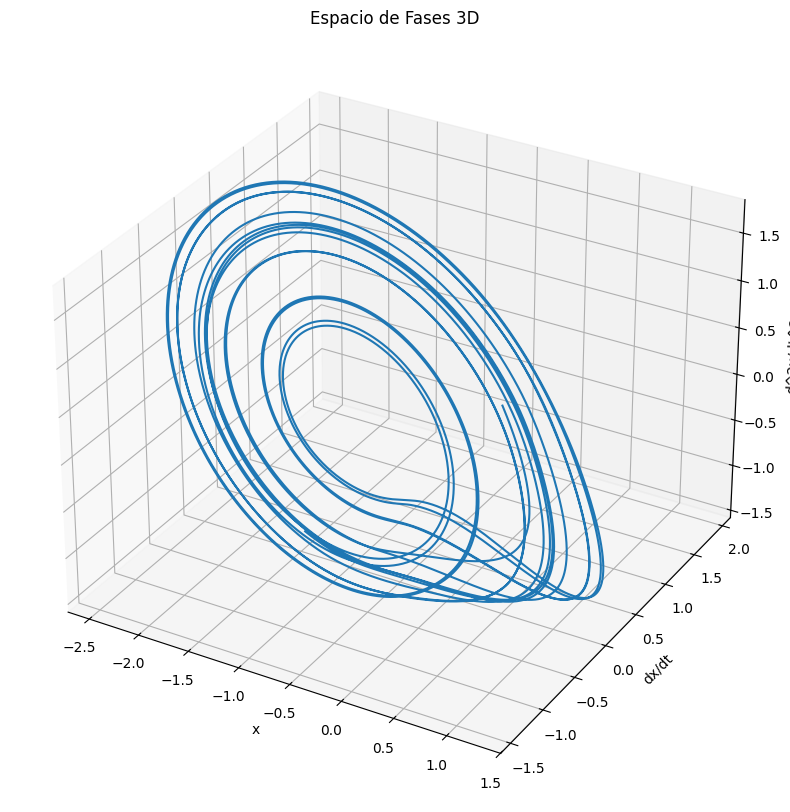

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la función que representa el sistema de ecuaciones diferenciales
def chaotic_oscillator(t, y, A):
    """
    Sistema de ecuaciones diferenciales para el oscilador caótico de tercer orden.

    Args:
        t (float): Tiempo actual (no utilizado directamente aquí, requerido por solve_ivp).
        y (list or numpy.ndarray): Vector de estado [x, dx/dt, d^2x/dt^2].
        A (float): Parámetro ajustable.

    Returns:
        list: Vector de las derivadas [dxdt, d2xdt2, d3xdt3].
    """
    x, dx_dt, d2x_dt2 = y
    d3x_dt3 = -A * d2x_dt2 - dx_dt + np.abs(x) - 1
    return [dx_dt, d2x_dt2, d3x_dt3]

# Establecer el valor del parámetro A para comportamiento caótico
A = 3/5

# Definir las condiciones iniciales
initial_conditions = [0, 0.8, 0]  # Puedes experimentar con diferentes valores

# Definir el intervalo de tiempo de simulación
t_span = (0, 100)  # Simular durante 100 unidades de tiempo
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Puntos de tiempo para la salida

# Resolver el sistema de ecuaciones diferenciales
solution = solve_ivp(chaotic_oscillator, t_span, initial_conditions, args=(A,), dense_output=True, t_eval=t_eval)

# Extraer las soluciones para x, dx/dt y d^2x/dt^2
x = solution.y[0]
dx_dt = solution.y[1]
d2x_dt2 = solution.y[2]

# Graficar la solución x(t)
plt.figure(figsize=(10, 6))
plt.plot(solution.t, x, label='x(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('x(t)')
plt.title(f'Solución de la Ecuación Diferencial Caótica (A = {A})')
plt.grid(True)
plt.legend()
plt.show()

# Opcional: Graficar el espacio de fases (x vs dx/dt)
plt.figure(figsize=(8, 8))
plt.plot(x, dx_dt, label='dx/dt vs x')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.title('Espacio de Fases')
plt.grid(True)
plt.legend()
plt.show()

# Opcional: Graficar el espacio de fases 3D (x vs dx/dt vs d2x/dt2)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, dx_dt, d2x_dt2)
ax.set_xlabel('x')
ax.set_ylabel('dx/dt')
ax.set_zlabel('d^2x/dt^2')
ax.set_title('Espacio de Fases 3D')
plt.show()